In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("superstore_data.xls")
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year and Month for time-series analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.strftime('%B')
df['Year-Month'] = df['Order Date'].dt.to_period('M')


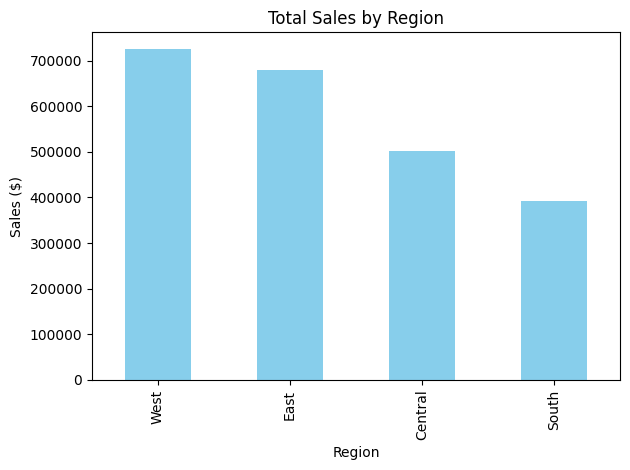

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total Sales by Region', color='skyblue')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()



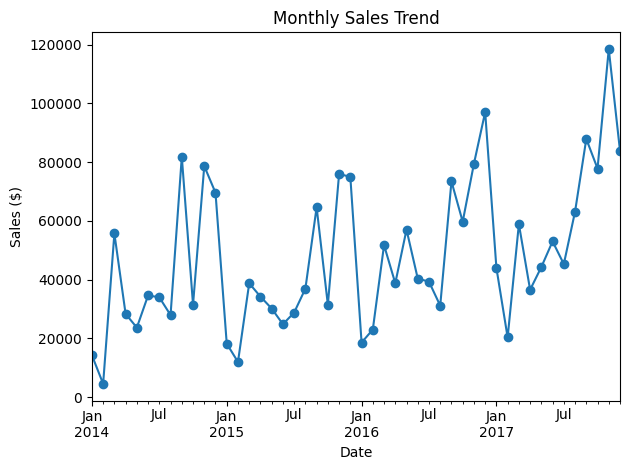

In [6]:
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


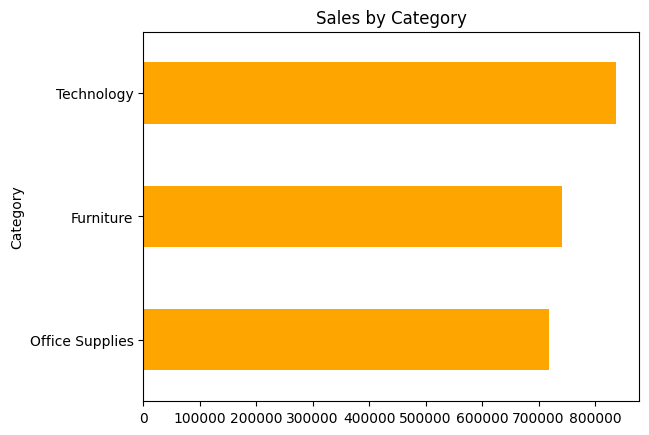

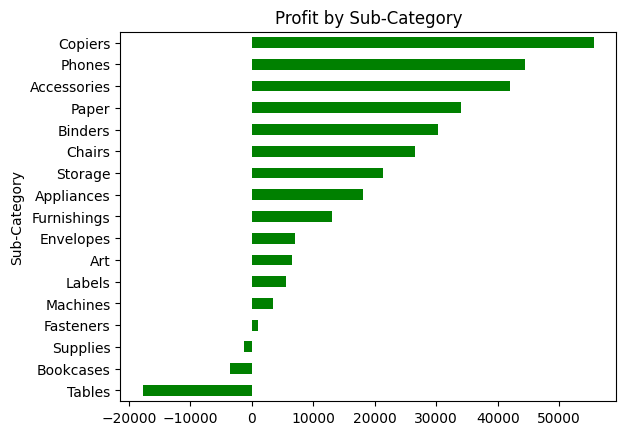

In [7]:
# Category
cat_sales = df.groupby('Category')['Sales'].sum().sort_values()
cat_sales.plot(kind='barh', title='Sales by Category', color='orange')
plt.show()

# Sub-Category
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.plot(kind='barh', title='Profit by Sub-Category', color='green')
plt.show()


In [8]:
summary = df.groupby(['Region', 'Category'])[['Sales', 'Profit']].sum().round(2)
summary.to_excel("sales_summary_by_region_category.xlsx")


In [9]:
import plotly.express as px

fig = px.bar(region_sales, x=region_sales.index, y=region_sales.values,
             labels={'x': 'Region', 'y': 'Total Sales'},
             title="Interactive Sales by Region")
fig.show()
